------------------------------------
# <center>- TP n°10 : Séries Temporelles -</center>
------------------------------------
***Thomas KOCH***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import math
import statsmodels.api as sm
from scipy import stats
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.mlab as mlab
import math
from scipy.stats import norm
import statsmodels.graphics.tsaplots as tsa

## <center>- Données "Syndromes grippaux" -</center>

### Question 1 :

Importez les données du fichier `Openhealth_S-Grippal.csv`. Consultez http://www.openhealth.fr/ias pour plus d’information sur les données. Affichez les 5 premières lignes du jeu de données. On va travailler seulement avec la variable `IAS_brut`, sous la forme d’une série temporelle, dont on précisera la fréquence d’échantillonage et les dates de début et de fin. Pour cette variable, dans ce jeu de données, les cas de nullité correspondent à des données manquantes. Combien de données manquantes comporte-t-elle ? Pour les traitements des questions suivantes, éliminez les données manquantes par imputation, c’est-à-dire en déduisant une valeur plus "raisonnable" aux dates nonobservées à partir des valeurs aux dates observées : par exemple par la moyenne de deux dates les plus proches.

In [2]:
df = pd.read_csv("OpenhealthS-Grippal.csv", delimiter=";", encoding="latin-1", decimal=",", na_values=0)

In [3]:
df.head()

,PERIODE,IAS_brut,IAS_lisse,Incidence_Sentinelles
0,2009-07-01,1.7,2.2,2.3
1,2009-07-02,3.4,2.1,2.3
2,2009-07-03,2.1,2.1,2.3
3,2009-07-04,1.3,2.0,2.3
4,2009-07-05,14.2,2.0,2.3


In [4]:
df.describe()

,IAS_brut,IAS_lisse,Incidence_Sentinelles
count,1744.000000,1752.000000,1734.000000
mean,316.680046,34.805023,13.536332
std,2752.169290,101.589259,22.547233
min,0.100000,0.300000,0.100000
25%,1.300000,1.200000,1.100000
50%,3.800000,2.850000,3.600000
75%,23.275000,11.400000,13.350000
max,71851.800000,863.100000,110.000000


In [5]:
print("Il y a {} valeurs manquantes pour la variable IAS_brut.".format(df['IAS_brut'].isnull().sum()))

Il y a 8 valeurs manquantes pour la variable IAS_brut.


> Nous obtenons donc 8 valeurs manquantes que nous allons choisir de combler grâce à ue interpolation linéraire.

In [6]:
df['IAS_brut'] = df['IAS_brut'].interpolate()

> On vérifie que la méthode a bien fonctionné.

In [7]:
df.head()

,PERIODE,IAS_brut,IAS_lisse,Incidence_Sentinelles
0,2009-07-01,1.7,2.2,2.3
1,2009-07-02,3.4,2.1,2.3
2,2009-07-03,2.1,2.1,2.3
3,2009-07-04,1.3,2.0,2.3
4,2009-07-05,14.2,2.0,2.3


In [8]:
df.describe()

,IAS_brut,IAS_lisse,Incidence_Sentinelles
count,1752.000000,1752.000000,1734.000000
mean,315.242808,34.805023,13.536332
std,2745.957058,101.589259,22.547233
min,0.100000,0.300000,0.100000
25%,1.300000,1.200000,1.100000
50%,3.800000,2.850000,3.600000
75%,23.100000,11.400000,13.350000
max,71851.800000,863.100000,110.000000


In [9]:
print("Il y a maintenant {} valeurs manquantes pour la variable IAS_brut.".format(df['IAS_brut'].isnull().sum()))

Il y a maintenant 0 valeurs manquantes pour la variable IAS_brut.


### Question 2 :
Tracez la série temporelle considérée en fonction du temps. Commentez brièvement ce que vous observez.

In [10]:
df['PERIODE'] = pd.to_datetime(df['PERIODE'])

In [11]:
df.head()

,PERIODE,IAS_brut,IAS_lisse,Incidence_Sentinelles
0,2009-07-01,1.7,2.2,2.3
1,2009-07-02,3.4,2.1,2.3
2,2009-07-03,2.1,2.1,2.3
3,2009-07-04,1.3,2.0,2.3
4,2009-07-05,14.2,2.0,2.3


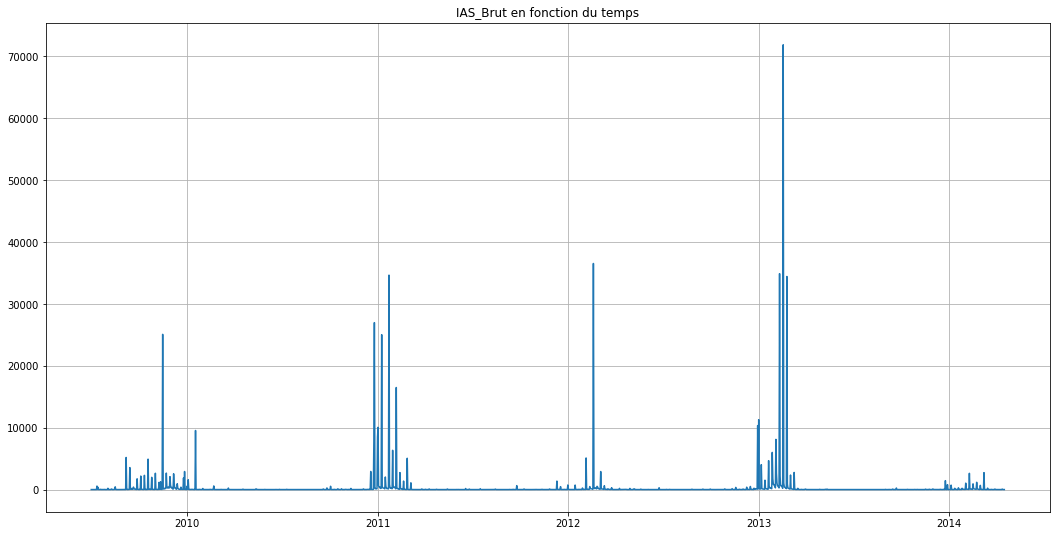

In [13]:
plt.figure(figsize=(18,9))
plt.plot(df['PERIODE'], df['IAS_brut'])
plt.title("IAS_Brut en fonction du temps")
plt.grid(True)
plt.show()

> On observe que des pics d'épidémie reviennent à interval régulier et principalement sur les mois d'hiver, ce qui est logique. On constate également une très forte épidémie en 2013, ainsi qu'une très faible épidémie en 2014, certainement consécutive à la vague de vaccination qui a due être engagé en 2013.

### Question 3 :
Tracez l’histogramme de la loi marginale. Quel impact la distribution observée par l’histogramme a sur la trajectoire représentée à la question précédente ?

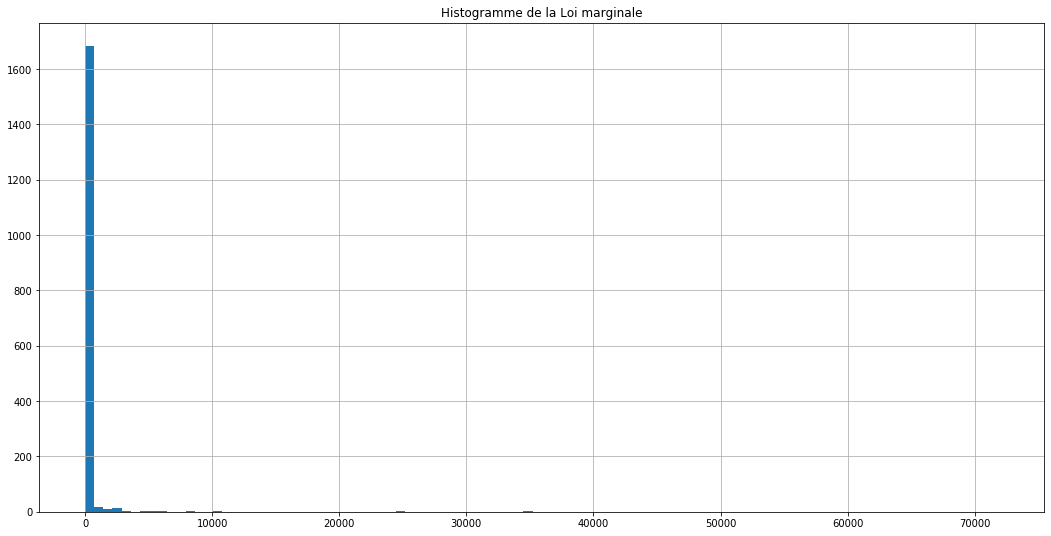

In [14]:
plt.figure(figsize=(18,9))
plt.hist(df['IAS_brut'], bins=100)
plt.title("Histogramme de la Loi marginale")
plt.grid(True)
plt.show()

> La distribution observée sur l'histogramme nous prouve que **la population est la plus grande partie du temps en bonne santé** et que **les pics observés** sur la figure précédentes **sont finalement le fait de valeurs extrèmes très peu représentées**. Cela relativise donc l'analyse que nous avons fait précédemment.

### Question 4 :
Reprenez les questions précédentes après tranformations des observations par le logarithme naturel. Commentez.

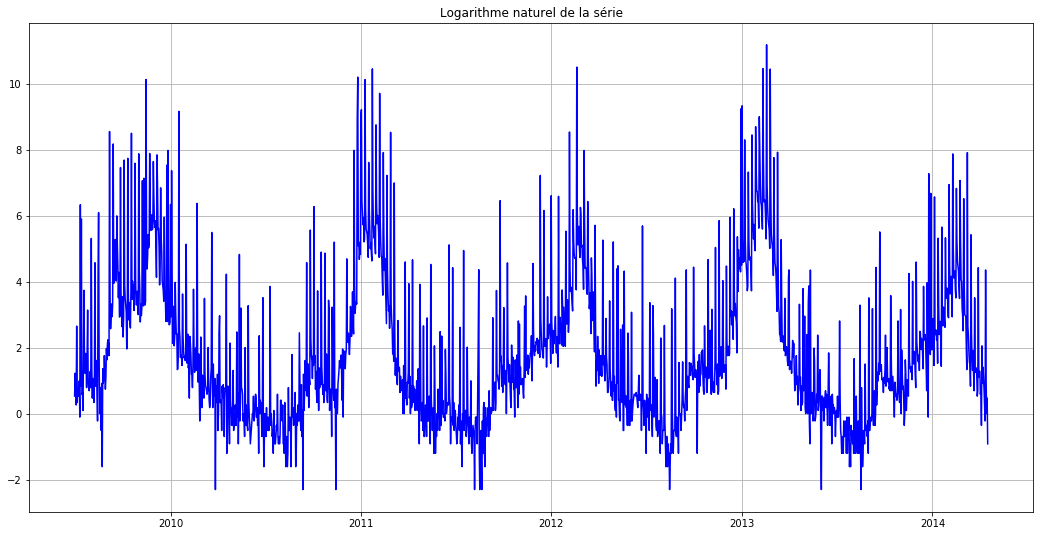

In [15]:
plt.figure(figsize=(18,9))
plt.plot(df['PERIODE'], np.log(df['IAS_brut']), color='blue')
plt.title("Logarithme naturel de la série")
plt.grid(True)
plt.show()

> On retrouve en partie les conclusions tirées précedemment mais avec cette fois des différences moins marquées entre 2013 et les autres années.

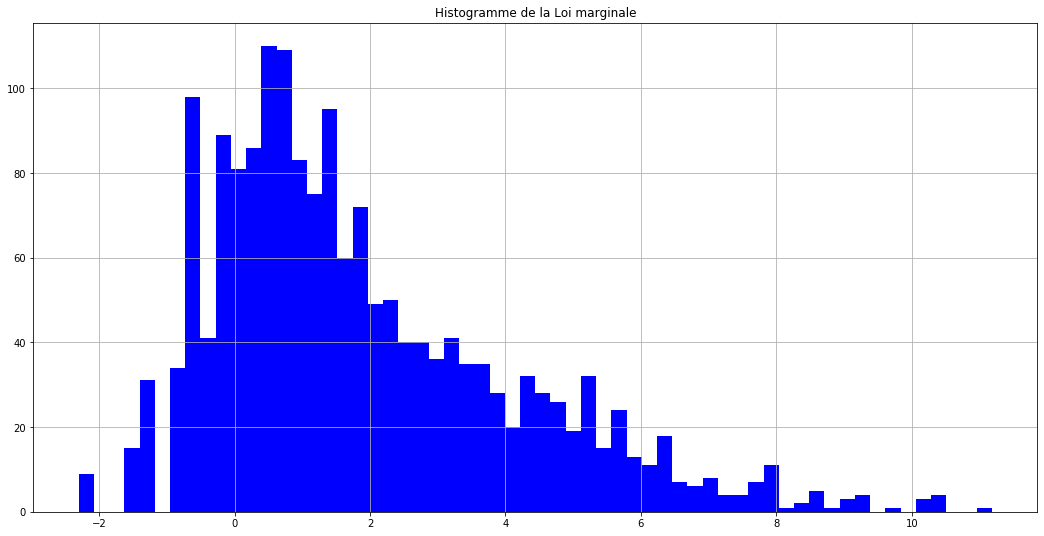

In [16]:
plt.figure(figsize=(18,9))
plt.hist(np.log(df['IAS_brut']), bins=60, color='blue')
plt.title("Histogramme de la Loi marginale")
plt.grid(True)
plt.show()

> L'histogramme nous permet cette fois de conclure sur le fait que ce sont bien les mois d'hivers qui ont le plus d'influence sur les épidémies de grippes.

### Question 5 : 
En utilisant `signal.periodogram()` (du package `signal` importé depuis `scipy`), tracez le périodogramme des données. Expliquez les pics les plus significatifs que vous observez. Attention au fait que dans la communauté signal les spectres sont normalisées pour des fréquences absolues dans $[−\frac{1}{2}, \frac{1}{2}]$ plutôt que $[−π, π]$.

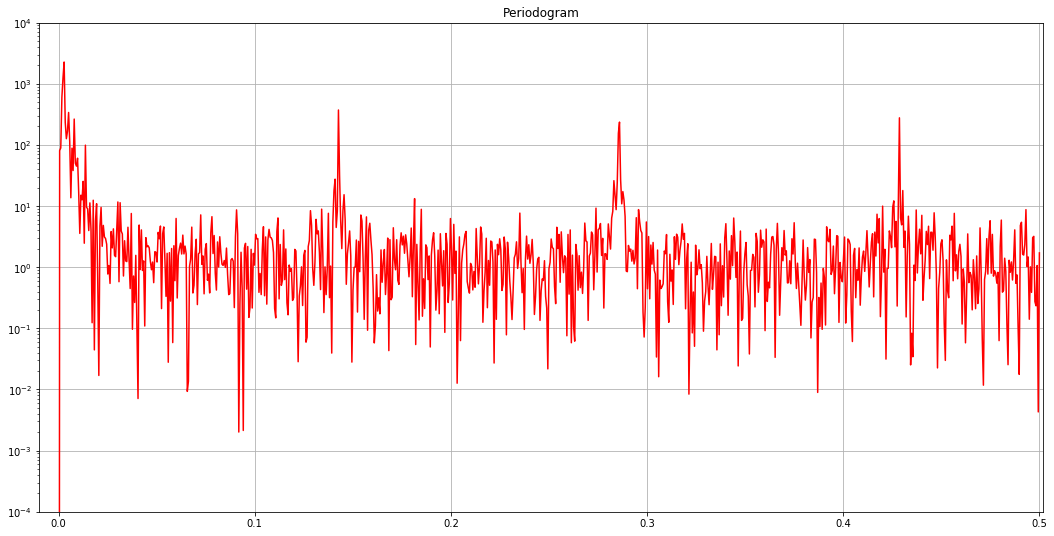

In [17]:
plt.figure(figsize=(18,9))
f, Pxx_den = signal.periodogram(np.log(df['IAS_brut']))
plt.semilogy(f, Pxx_den, color='red')
plt.xlim([-1e-2, 0.502])
plt.ylim([1e-4, 1e+4])
plt.title("Periodogram")
plt.grid(True)
plt.show()

In [18]:
np.argmax(Pxx_den)

5

In [19]:
1/f[5]

350.40000000000003

> *Explication des pics les plus significatifs :* Les pics correspondent à des évènements périodiques qui ne peuvent être expliqués par le bruit de fond. Il convient donc de s'y pencher.

> Le premier pic correspond donc à une périodicité de 350 jours qui prouve que les épidémies reviennent généralement au bout de 350 jours. On retrouve donc globalement une **périodicité annuelle**. De même, on retrouve une autre périodicité de 7 jours qui correspond à la fréquence à laquelle les gens vont chez le médecin et se font donc déclarer.

In [20]:
Pxx_den.argsort()

array([  0, 161, 165, 875,  71, 563, 678, 115, 826, 356, 116, 536,  36,
       858, 437, 785, 607, 761, 848, 389,  98, 262, 214, 792, 739, 640,
       534, 763, 617, 244, 295,  32, 588, 332, 568, 319, 282, 810, 458,
       102, 221, 709, 461, 840, 359, 825, 672, 222, 523, 454, 400, 590,
       762, 566, 345, 576, 631, 276, 416, 682,  66, 857,  70, 680, 460,
        77, 283, 663, 685, 807, 847, 703, 791,  30, 697, 545, 379, 610,
       473, 430, 322, 405, 273, 391, 867, 611, 194, 170, 757, 734, 325,
       644, 598, 205, 357, 425, 287, 340, 564, 237, 267, 522, 708, 285,
       337, 816, 560, 819,  92, 327, 193, 436, 487, 173, 383, 157, 171,
       524, 622, 749, 873, 592, 218, 716, 581, 124, 549, 662, 186, 162,
       444, 821, 204, 348,  68, 673, 544, 872, 633, 100, 577, 209, 772,
       667, 352, 297, 197, 528, 106, 286, 210, 795, 712, 674, 242, 679,
       404, 298, 594, 728, 316, 426,  96, 435, 616, 215, 184, 704, 811,
       239, 152, 181, 292, 456, 130, 693, 153, 468, 367, 120, 13

In [21]:
1/f[250]

7.008000000000001

> On retrouve la périodicité de 7 jours.

In [22]:
1/f[751]

2.3328894806924105

> On retrouve ici ce qui pourrait correspondre à la période d'incubation de la grippe.

### Question 6 :
Pour supprimer une tendance périodique de période $T$ dans un signal $(x_t)_{t∈\mathbb{Z}}$ il suffit d’appliquer
le filtre $∆_T$ défini par :
$$
[∆_T \ x]_t = x_t − x_{t−T}
$$
Utilisez cette méthode pour supprimer la tendance périodique de période 1 an. Quel pic du périodogramme cette méthode a fait disparaître ?

In [23]:
time_diff = []
for i in range(365, len(df)) :
    time_diff.append(np.log(df.loc[i]['IAS_brut']) - np.log(df.loc[i-365]['IAS_brut']))
    
periode = []
for i in range(365, len(df)):
    periode.append(df.loc[i]['PERIODE'])

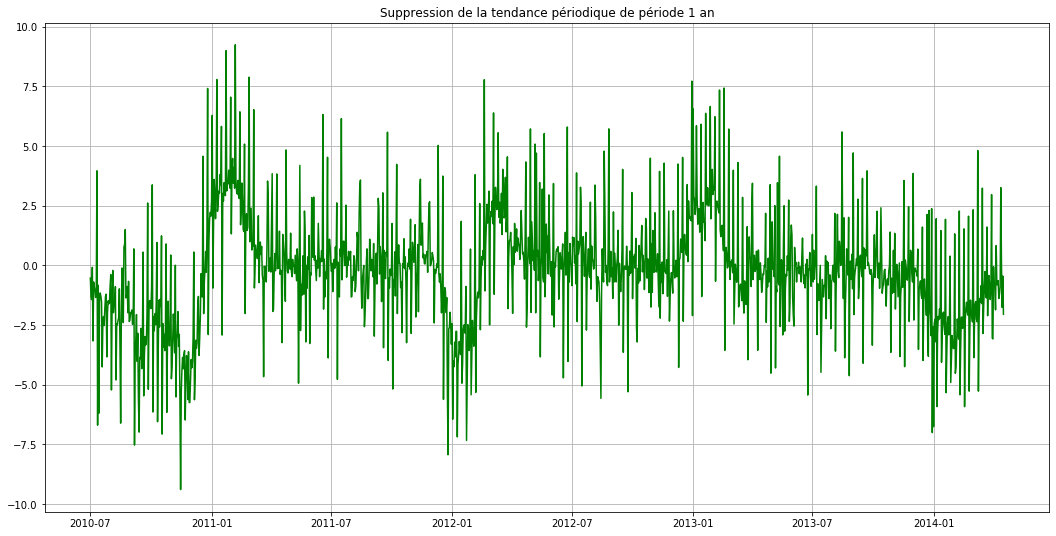

In [24]:
plt.figure(figsize=(18,9))
plt.plot(periode, time_diff, color='green')
plt.title("Suppression de la tendance périodique de période 1 an")
plt.grid(True)
plt.show()

> Cette méthode nous montre donc que **quelques pics ont disparu**. Nous perdons 1 an de données avec cette méthode mais nous retrouvons globalement les trajectoires observées précédemment. 

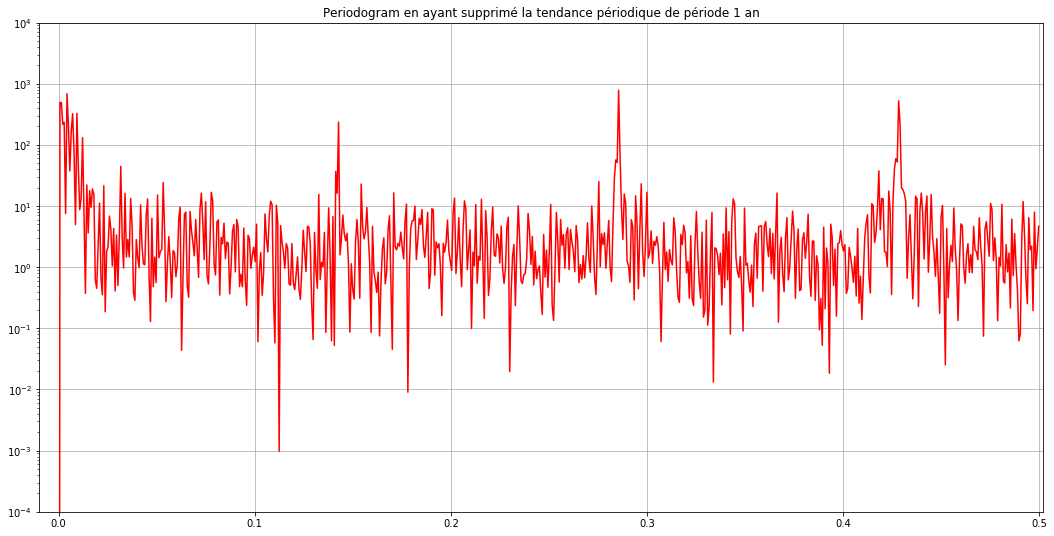

In [25]:
plt.figure(figsize=(18,9))
f2, Pxx_den2 = signal.periodogram(time_diff)
plt.semilogy(f2, Pxx_den2, color='red')
plt.xlim([-1e-2, 0.502])
plt.ylim([1e-4, 1e+4])
plt.title("Periodogram en ayant supprimé la tendance périodique de période 1 an")
plt.grid(True)
plt.show()

> On retrouve globalement le même Periodogram que précédemment, **excepté bien sûr pour la pérodicité de 1 an que nous avons cette fois supprimée**. 

### Question 7 :
On vous propose un exercice de prédiction uniquement à partir de la tendance périodique. On va prédire les valeurs de `IAS_brut` pour les dates du 1er avril 2013 au 17 avril 2014 en se basant sur les observations précédentes (du 1er juillet 2009 au 31 mars 2013) pour estimer la tendance périodique des données. Pour cela, pour un nombre d’harmoniques fixé (disons `n_harm`), construisez les variables explicatives pour la période d’apprentissage : pour chaque $k = 1, 2, ... n_{harm}$, ajoutez deux variables explicatives, $x_{i,2k−1} = cos(t_i · k · \frac{2π}{T})$ et $x_{i,2k} = sin(t_i · k · \frac{2π}{T})$, où $t_i$ est le moment de temps (on peut utiliser les nombres entiers au lieu de dates) et $T = 365$. 

Estimez la tendance périodique en régressant les données d’apprentissage sur ces variables explicatives. Avec ce modèle linéaire, prédisez les valeurs du variable `IAS_brut` pour la période du 1er avril 2013 au 17 avril 2014. Tracez les valeur de la série temporelle et votre prédiction pour l’ensemble de données (vous pouvez utilisez les couleurs différentes pour pour les partie apprentissage et prédiction). Puis, donnez le risque quadratique de la prédiction et tracez les résidus pour la période prédite. 

Essayez les valeur de `n_harm` pour voir comment varie le risque quadratique de la prédiction.

> Commençons par tester avec `n_harm = 10`. 

In [69]:
n_harm = 10

In [70]:
X = df.copy()
X['index'] = X.index

In [71]:
X.head()

,PERIODE,IAS_brut,IAS_lisse,Incidence_Sentinelles,index
0,2009-07-01,1.7,2.2,2.3,0
1,2009-07-02,3.4,2.1,2.3,1
2,2009-07-03,2.1,2.1,2.3,2
3,2009-07-04,1.3,2.0,2.3,3
4,2009-07-05,14.2,2.0,2.3,4


In [72]:
for k in range(1, n_harm + 1) :
    X['add_cos ' + str(k)] = np.cos(X['index'] * k * 2 * math.pi / 365)
    X['add_sin ' + str(k)] = np.sin(X['index'] * k * 2 * math.pi / 365)

In [73]:
X_train = X[X['PERIODE'] <= "2013-03-31"].drop(['IAS_lisse', 'Incidence_Sentinelles'], axis=1)
X_test = X[X['PERIODE'] > "2013-03-31"].drop(['IAS_lisse', 'Incidence_Sentinelles'], axis=1)

In [74]:
X_train.head()

,PERIODE,IAS_brut,index,add_cos 1,add_sin 1,add_cos 2,add_sin 2,add_cos 3,add_sin 3,add_cos 4,...,add_cos 6,add_sin 6,add_cos 7,add_sin 7,add_cos 8,add_sin 8,add_cos 9,add_sin 9,add_cos 10,add_sin 10
0,2009-07-01,1.7,0,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
1,2009-07-02,3.4,1,0.999852,0.017213,0.999407,0.034422,0.998667,0.051620,0.997630,...,0.994671,0.103102,0.992749,0.120208,0.990532,0.137279,0.988023,0.154309,0.985220,0.171293
2,2009-07-03,2.1,2,0.999407,0.034422,0.997630,0.068802,0.994671,0.103102,0.990532,...,0.978740,0.205104,0.971100,0.238673,0.962309,0.271958,0.952378,0.304921,0.941317,0.337523
3,2009-07-04,1.3,3,0.998667,0.051620,0.994671,0.103102,0.988023,0.154309,0.978740,...,0.952378,0.304921,0.935368,0.353676,0.915864,0.401488,0.893919,0.448229,0.869589,0.493776
4,2009-07-05,14.2,4,0.997630,0.068802,0.990532,0.137279,0.978740,0.205104,0.962309,...,0.915864,0.401488,0.886071,0.463550,0.852078,0.523416,0.814046,0.580800,0.772157,0.635432


> Estimons donc la tendance périodique en régressant les données d’apprentissage sur les variables explicatives créées.

**ENLEVER L'INDEX DANS X_TRAIN POUR VÉRIFIER SI LES RÉSULTATS OBTENUS SONT MEILLEURS.** ??


In [75]:
y_train = X_train['IAS_brut']
X_train = X_train.drop(['IAS_brut', 'PERIODE'], axis=1) # On enlève l'index ?!

In [76]:
estim_res = sm.OLS(y_train, X_train).fit()
print(estim_res.summary())

                                 OLS Regression Results                                
Dep. Variable:               IAS_brut   R-squared (uncentered):                   0.061
Model:                            OLS   Adj. R-squared (uncentered):              0.046
Method:                 Least Squares   F-statistic:                              4.138
Date:                Sat, 25 Jan 2020   Prob (F-statistic):                    1.25e-09
Time:                        17:01:22   Log-Likelihood:                         -12925.
No. Observations:                1370   AIC:                                  2.589e+04
Df Residuals:                    1349   BIC:                                  2.600e+04
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

> Utilisons alors notre modèle linéaire pour prédire les valeurs de la variable `IAS_brut` pour la période allant du 1er avril 2013 au 17 avril 2014.

In [77]:
y_test = X_test['IAS_brut']
X_test = X_test.drop(['PERIODE', 'IAS_brut'], axis = 1) # On enlève l'index ?!

In [78]:
y_pred = estim_res.predict(X_test)
y_pred.head()

1370    416.414320
1371    423.019856
1372    424.415954
1373    420.871470
1374    412.787134
dtype: float64

In [79]:
period_test = df[df['PERIODE'] > "2013-03-31"].drop(['IAS_brut','IAS_lisse', 'Incidence_Sentinelles'], axis=1)
period_test.head()

,PERIODE
1370,2013-04-01
1371,2013-04-02
1372,2013-04-03
1373,2013-04-04
1374,2013-04-05


In [80]:
period_train = df[df['PERIODE'] <= "2013-03-31"].drop(['IAS_brut','IAS_lisse', 'Incidence_Sentinelles'], axis=1)
period_train.head()

,PERIODE
0,2009-07-01
1,2009-07-02
2,2009-07-03
3,2009-07-04
4,2009-07-05


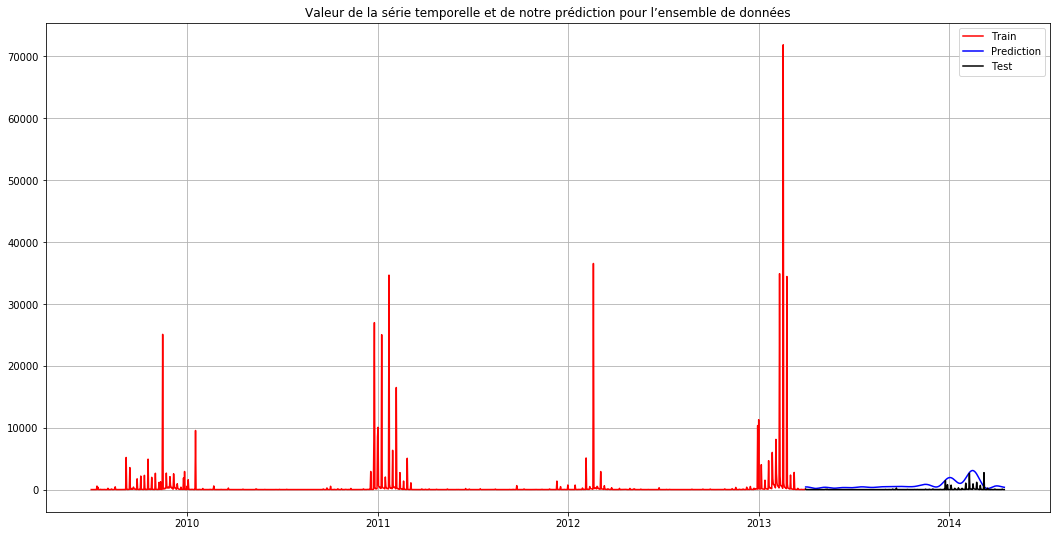

In [81]:
plt.figure(figsize=(18,9))
plt.plot(period_train, y_train, label="Train", color='red')
plt.plot(period_test, y_pred, label="Prediction", color='blue')
plt.plot(period_test, y_test, label="Test", color='black')
plt.legend()
plt.title("Valeur de la série temporelle et de notre prédiction pour l’ensemble de données")
plt.grid(True)
plt.show()

> Calculons alors le risque quadratique et les résidus associés.

In [82]:
mean_quad_risk = sum((y_test - y_pred)**2)/len(y_pred)
mean_quad_risk

832167.225398574

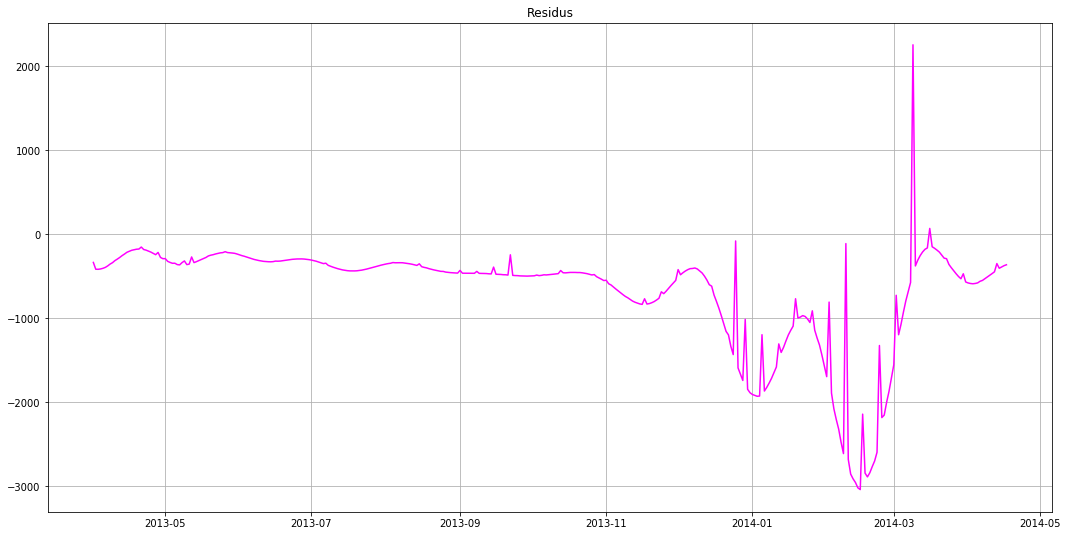

In [83]:
residus = y_test - y_pred

plt.figure(figsize=(18,9))
plt.plot(period_test, residus, color='magenta')
plt.title("Residus")
plt.grid(True)
plt.show()

> On remarque que notre modèle avec $n_{harm}=10$ n'est peut-être pas le plus optimal, essayons donc d'autres valeurs à l'aide d'un Grid Search.

In [84]:
n_harm = [5, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 350]

list_mean_quad_risk = []
for i in n_harm :
    print("Début du calcul pour n_harm = {}".format(i))
    X = df.copy()
    X['index'] = X.index
    
    for k in range(1, i + 1) :
        X['add_cos ' + str(i) + str(k)] = np.cos(X['index'] * k * 2 * math.pi / 365)
        X['add_sin ' + str(i) + str(k)] = np.sin(X['index'] * k * 2 * math.pi / 365)
    
    X_train = X[X['PERIODE'] <= "2013-03-31"].drop(['IAS_lisse', 'Incidence_Sentinelles'], axis=1)
    X_test = X[X['PERIODE'] > "2013-03-31"].drop(['IAS_lisse', 'Incidence_Sentinelles'], axis=1)
    
    y_train = X_train['IAS_brut']
    X_train = X_train.drop(['IAS_brut', 'PERIODE'], axis=1)
    
    estim_res = sm.OLS(y_train, X_train).fit()
    
    y_test = X_test['IAS_brut']
    X_test = X_test.drop(['PERIODE', 'IAS_brut'], axis = 1)
    
    y_pred = estim_res.predict(X_test)
    
    mean_quad_risk = sum((y_test - y_pred)**2)/len(y_pred)
    list_mean_quad_risk.append(mean_quad_risk)
    print("Fin du calcul pour n_harm = {} \n".format(i))

Début du calcul pour n_harm = 5
Fin du calcul pour n_harm = 5 

Début du calcul pour n_harm = 25
Fin du calcul pour n_harm = 25 

Début du calcul pour n_harm = 50
Fin du calcul pour n_harm = 50 

Début du calcul pour n_harm = 75
Fin du calcul pour n_harm = 75 

Début du calcul pour n_harm = 100
Fin du calcul pour n_harm = 100 

Début du calcul pour n_harm = 125
Fin du calcul pour n_harm = 125 

Début du calcul pour n_harm = 150
Fin du calcul pour n_harm = 150 

Début du calcul pour n_harm = 175
Fin du calcul pour n_harm = 175 

Début du calcul pour n_harm = 200
Fin du calcul pour n_harm = 200 

Début du calcul pour n_harm = 225
Fin du calcul pour n_harm = 225 

Début du calcul pour n_harm = 250
Fin du calcul pour n_harm = 250 

Début du calcul pour n_harm = 275
Fin du calcul pour n_harm = 275 

Début du calcul pour n_harm = 300
Fin du calcul pour n_harm = 300 

Début du calcul pour n_harm = 350
Fin du calcul pour n_harm = 350 



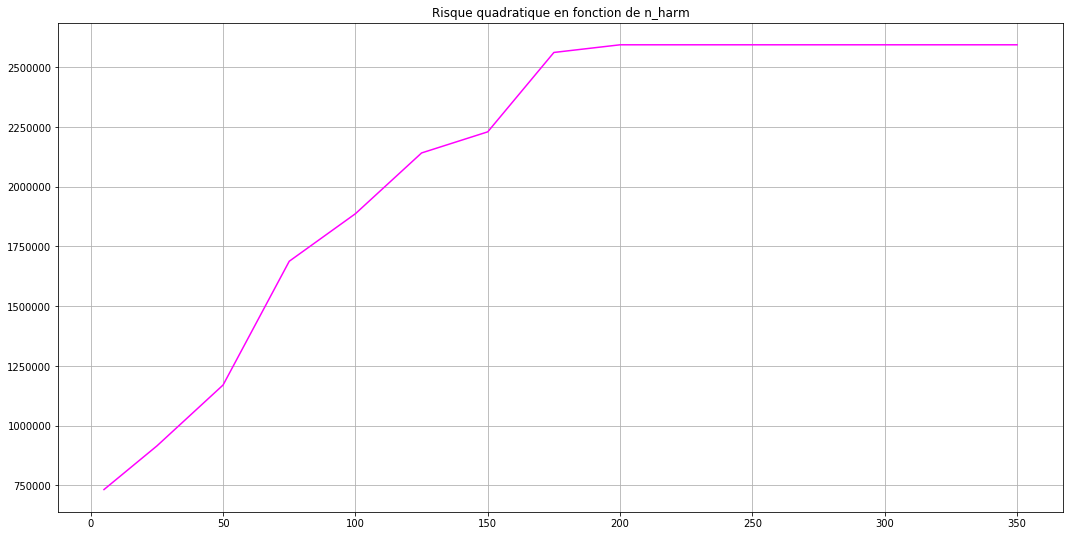

In [85]:
plt.figure(figsize=(18,9))
plt.plot(n_harm, list_mean_quad_risk, color='magenta')
plt.title("Risque quadratique en fonction de n_harm")
plt.grid(True)
plt.show()

> On remarque donc que le risque quadratique ne fait qu'augmenter avec la grid de $n_{harm}$ choisie, vérifions donc cela avec des valeurs plus petite.

In [86]:
n_harm = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

list_mean_quad_risk = []
for i in n_harm :
    print("Début du calcul pour n_harm = {}".format(i))
    X = df.copy()
    X['index'] = X.index
    
    for k in range(1, i + 1) :
        X['add_cos ' + str(i) + str(k)] = np.cos(X['index'] * k * 2 * math.pi / 365)
        X['add_sin ' + str(i) + str(k)] = np.sin(X['index'] * k * 2 * math.pi / 365)
    
    X_train = X[X['PERIODE'] <= "2013-03-31"].drop(['IAS_lisse', 'Incidence_Sentinelles'], axis=1)
    X_test = X[X['PERIODE'] > "2013-03-31"].drop(['IAS_lisse', 'Incidence_Sentinelles'], axis=1)
    
    y_train = X_train['IAS_brut']
    X_train = X_train.drop(['IAS_brut', 'PERIODE'], axis=1)
    
    estim_res = sm.OLS(y_train, X_train).fit()
    
    y_test = X_test['IAS_brut']
    X_test = X_test.drop(['PERIODE', 'IAS_brut'], axis = 1)
    
    y_pred = estim_res.predict(X_test)
    
    mean_quad_risk = sum((y_test - y_pred)**2)/len(y_pred)
    list_mean_quad_risk.append(mean_quad_risk)
    print("Fin du calcul pour n_harm = {} \n".format(i))

Début du calcul pour n_harm = 1
Fin du calcul pour n_harm = 1 

Début du calcul pour n_harm = 2
Fin du calcul pour n_harm = 2 

Début du calcul pour n_harm = 3
Fin du calcul pour n_harm = 3 

Début du calcul pour n_harm = 4
Fin du calcul pour n_harm = 4 

Début du calcul pour n_harm = 5
Fin du calcul pour n_harm = 5 

Début du calcul pour n_harm = 6
Fin du calcul pour n_harm = 6 

Début du calcul pour n_harm = 7
Fin du calcul pour n_harm = 7 

Début du calcul pour n_harm = 8
Fin du calcul pour n_harm = 8 

Début du calcul pour n_harm = 9
Fin du calcul pour n_harm = 9 

Début du calcul pour n_harm = 10
Fin du calcul pour n_harm = 10 



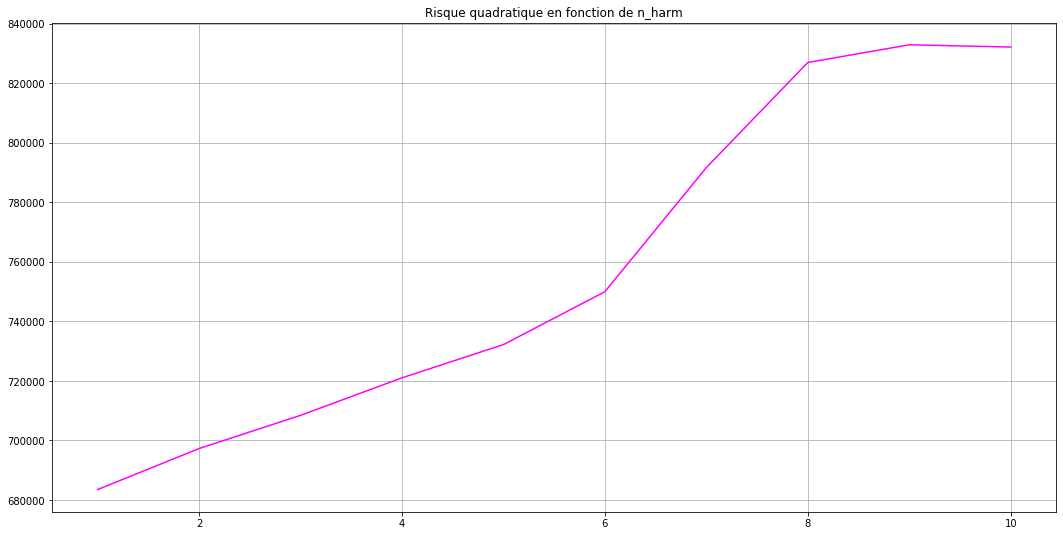

In [87]:
plt.figure(figsize=(18,9))
plt.plot(n_harm, list_quad_risk, color='magenta')
plt.title("Risque quadratique en fonction de n_harm")
plt.grid(True)
plt.show()

In [139]:
n_harm = 10
print("Début du calcul pour n_harm = {}".format(n_harm))
X = df.copy()
X['index'] = X.index
    
for k in range(1, n_harm + 1) :
    X['add_cos ' + str(i) + str(k)] = np.cos(X['index'] * k * 2 * math.pi / 365)
    X['add_sin ' + str(i) + str(k)] = np.sin(X['index'] * k * 2 * math.pi / 365)
    
X_train = X[X['PERIODE'] <= "2013-03-31"].drop(['IAS_lisse', 'Incidence_Sentinelles'], axis=1)
X_test = X[X['PERIODE'] > "2013-03-31"].drop(['IAS_lisse', 'Incidence_Sentinelles'], axis=1)
    
y_train = X_train['IAS_brut']
X_train = X_train.drop(['IAS_brut', 'PERIODE'], axis=1)
    
estim_res = sm.OLS(y_train, X_train).fit()
    
y_test = X_test['IAS_brut']
X_test = X_test.drop(['PERIODE', 'IAS_brut'], axis = 1)
    
y_pred = estim_res.predict(X_test)
    
mean_quad_risk = sum((y_test - y_pred)**2)/len(y_pred)
print("Fin du calcul pour n_harm = {} \n".format(n_harm))

Début du calcul pour n_harm = 10
Fin du calcul pour n_harm = 10 



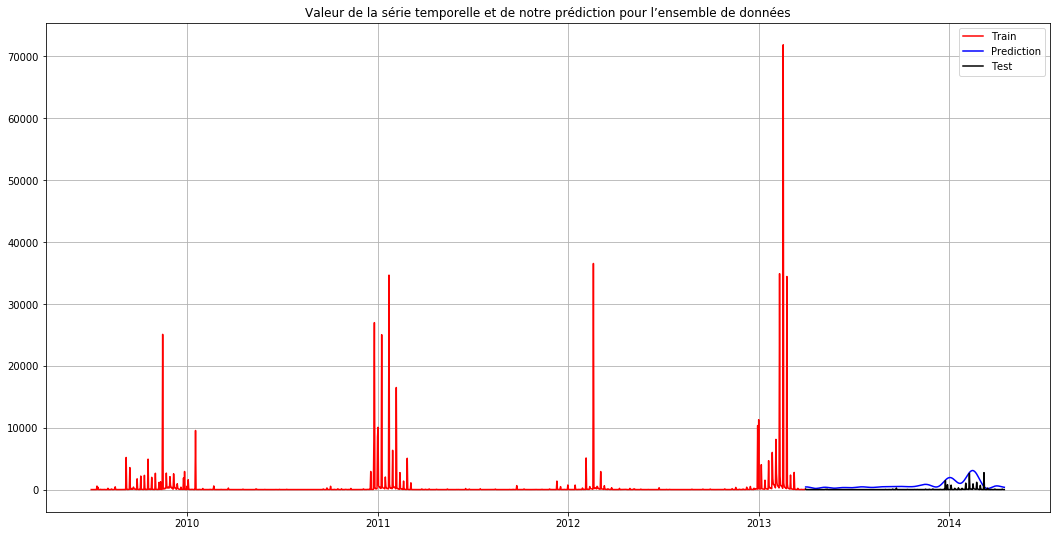

In [140]:
plt.figure(figsize=(18,9))
plt.plot(period_train, y_train, label="Train", color='red')
plt.plot(period_test, y_pred, label="Prediction", color='blue')
plt.plot(period_test, y_test, label="Test", color='black')
plt.legend()
plt.title("Valeur de la série temporelle et de notre prédiction pour l’ensemble de données")
plt.grid(True)
plt.show()

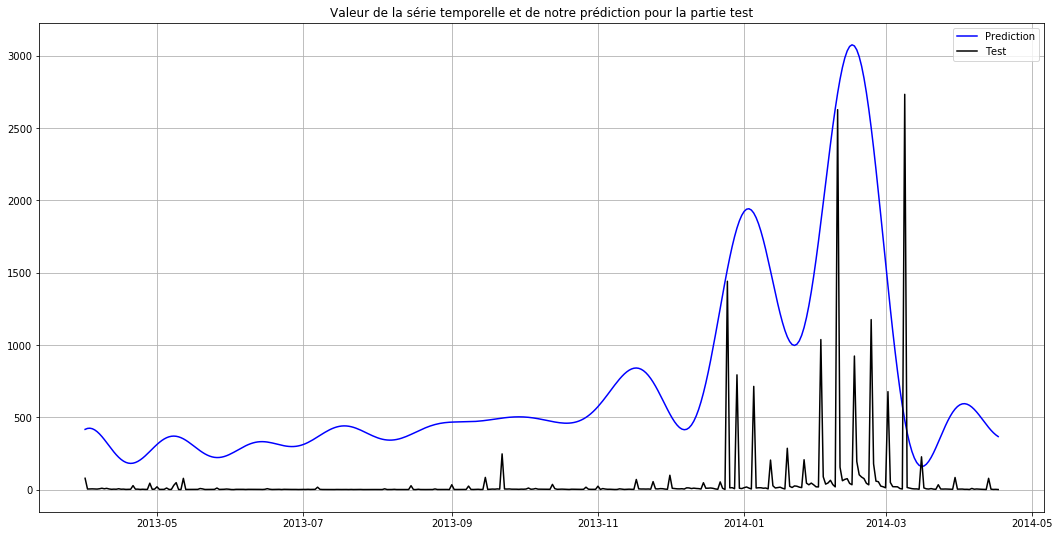

In [141]:
plt.figure(figsize=(18,9))
plt.plot(period_test, y_pred, label="Prediction", color='blue')
plt.plot(period_test, y_test, label="Test", color='black')
plt.legend()
plt.title("Valeur de la série temporelle et de notre prédiction pour la partie test")
plt.grid(True)
plt.show()

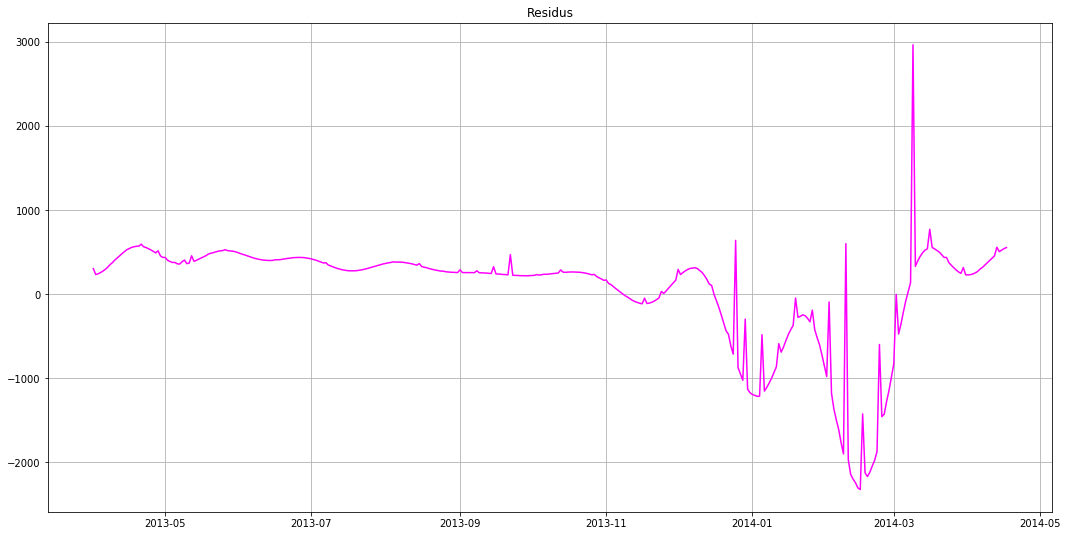

In [136]:
residus = y_test - y_pred

plt.figure(figsize=(18,9))
plt.plot(period_test, residus, color='magenta')
plt.title("Residus")
plt.grid(True)
plt.show()

> D'après nos calculs, le **risque quadratique moyen est minimal pour n_harm = 1**, toutefois, on constate que l'allure de la courbe de prédiction ne vient pas vraiment coller à la réalité. Aussi, il convient de trouver le bon compris entre minimistation de l'erreur quadratique moyenne et allure de la courbe à prédire puisque notre cas est particulier avec cette tendance périodique annuelle. En testant sur différentes valeurs, on se rend alors compte que le bon compromis se situe pour un nombre d'harmoniques compris entre **5 et 10**. 

> Voyons ce que nous pouvons obtenir avec `sklearn` par curiosité.

---------------------------------------------
------------------------------------------------

In [89]:
n_harm = [5, 25, 50, 75, 100, 125, 150, 175, 200]

list_quad_risk = []
for i in n_harm :
    print("Début du calcul pour n_harm = {}".format(i))
    X = df.copy()
    X['index'] = X.index
    
    for k in range(1, i + 1) :
        X['add_cos ' + str(i) + str(k)] = np.cos(X['index'] * k * 2 * math.pi / 365)
        X['add_sin ' + str(i) + str(k)] = np.sin(X['index'] * k * 2 * math.pi / 365)
    
    X_train = X[X['PERIODE'] <= "2013-03-31"].drop(['IAS_lisse', 'Incidence_Sentinelles'], axis=1)
    X_test = X[X['PERIODE'] > "2013-03-31"].drop(['IAS_lisse', 'Incidence_Sentinelles'], axis=1)
    
    y_train = X_train['IAS_brut']
    X_train = X_train.drop(['IAS_brut', 'PERIODE', 'index'], axis=1)
    
    reg = LinearRegression().fit(X_train, y_train)
    
    y_test = X_test['IAS_brut']
    X_test = X_test.drop(['PERIODE', 'IAS_brut', 'index'], axis = 1)
    
    y_pred = reg.predict(X_test)
    
    list_quad_risk.append(mean_squared_error(y_test, y_pred))
    print("Fin du calcul pour n_harm = {} \n".format(i))

Début du calcul pour n_harm = 5
Fin du calcul pour n_harm = 5 

Début du calcul pour n_harm = 25
Fin du calcul pour n_harm = 25 

Début du calcul pour n_harm = 50
Fin du calcul pour n_harm = 50 

Début du calcul pour n_harm = 75
Fin du calcul pour n_harm = 75 

Début du calcul pour n_harm = 100
Fin du calcul pour n_harm = 100 

Début du calcul pour n_harm = 125
Fin du calcul pour n_harm = 125 

Début du calcul pour n_harm = 150
Fin du calcul pour n_harm = 150 

Début du calcul pour n_harm = 175
Fin du calcul pour n_harm = 175 

Début du calcul pour n_harm = 200
Fin du calcul pour n_harm = 200 



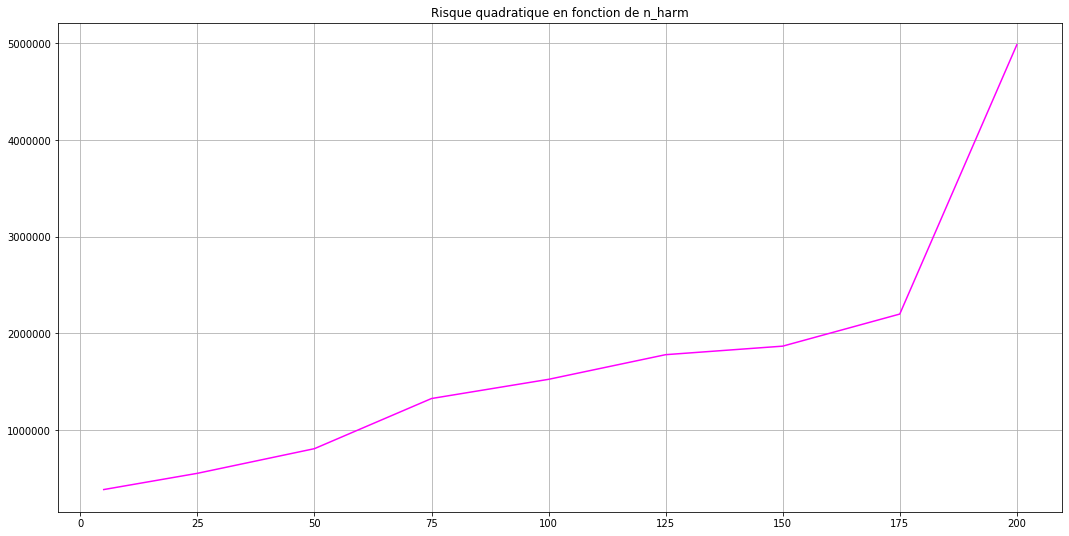

In [90]:
plt.figure(figsize=(18,9))
plt.plot(n_harm, list_quad_risk, color='magenta')
plt.title("Risque quadratique en fonction de n_harm")
plt.grid(True)
plt.show()

In [142]:
n_harm = 10

for k in range(1, n_harm + 1) :
        X['add_cos ' + str(k)] = np.cos(X['index'] * k * 2 * math.pi / 365)
        X['add_sin ' + str(k)] = np.sin(X['index'] * k * 2 * math.pi / 365)
    
X_train = X[X['PERIODE'] <= "2013-03-31"].drop(['IAS_lisse', 'Incidence_Sentinelles'], axis=1)
X_test = X[X['PERIODE'] > "2013-03-31"].drop(['IAS_lisse', 'Incidence_Sentinelles'], axis=1)
    
y_train = X_train['IAS_brut']
X_train = X_train.drop(['IAS_brut', 'PERIODE'], axis=1)
    
reg = LinearRegression().fit(X_train, y_train)
    
y_test = X_test['IAS_brut']
X_test = X_test.drop(['PERIODE', 'IAS_brut'], axis = 1)
    
y_pred = reg.predict(X_test)

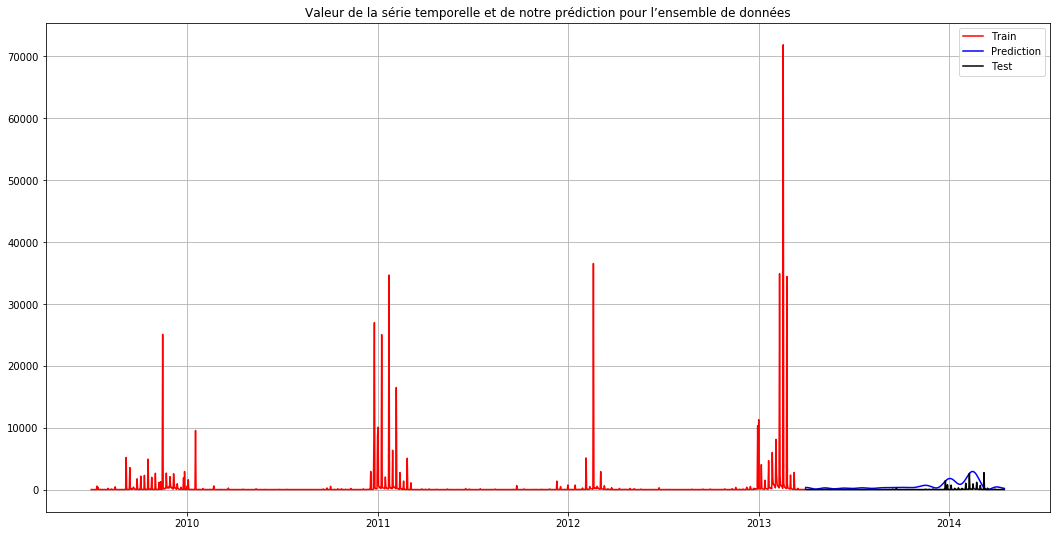

In [143]:
plt.figure(figsize=(18,9))
plt.plot(period_train ,y_train, label="Train", color='red')
plt.plot(period_test, y_pred, label="Prediction", color='blue')
plt.plot(period_test, y_test, label="Test", color='black')
plt.legend()
plt.title("Valeur de la série temporelle et de notre prédiction pour l’ensemble de données")
plt.grid(True)
plt.show()

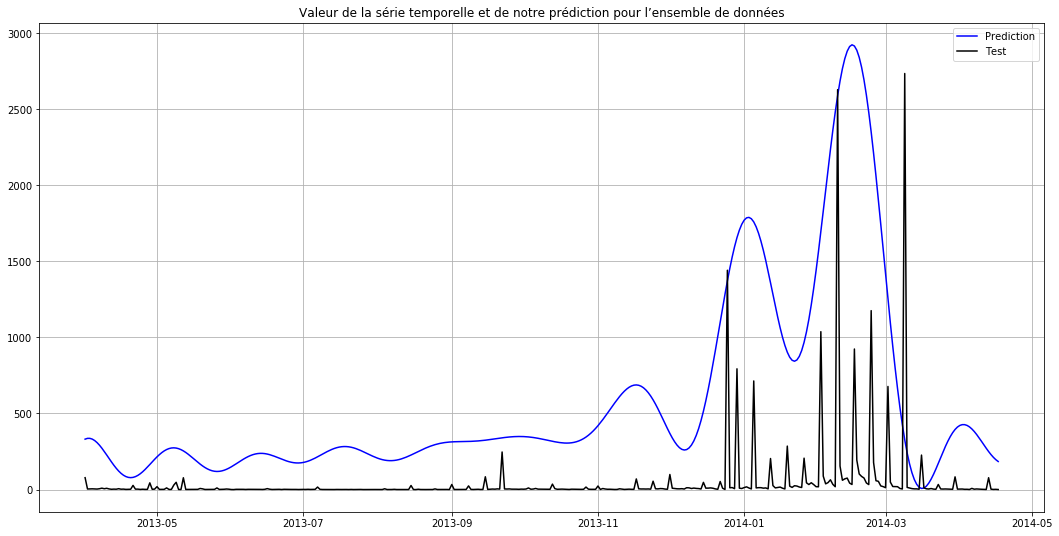

In [144]:
plt.figure(figsize=(18,9))
plt.plot(period_test, y_pred, label="Prediction", color='blue')
plt.plot(period_test, y_test, label="Test", color='black')
plt.legend()
plt.title("Valeur de la série temporelle et de notre prédiction pour l’ensemble de données")
plt.grid(True)
plt.show()